In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read CSV file
header_rows = 12
df = pd.read_csv('data/data.csv', skiprows=header_rows)

# Get columns
time_column = df.iloc[:, 0].values
signal_column = df.iloc[:, 1].values
bhd_ac_column = df.iloc[:, 2].values
bhd_dc_column = df.iloc[:, 3].values

# Trigger condition: rising edge
trigger_level = 2  # Trigger level in V
triggered = False
trigger_points = []

# Detect rising edge
for i in range(1, len(signal_column)):
    if signal_column[i-1] < trigger_level <= signal_column[i]:
        triggered = True
        trigger_points.append({'Time': time_column[i], 'Index': i})

# Output trigger points information
if triggered:
    # print("Rising Edge Trigger Points:")
    # for point in trigger_points:
    #     print(f"Time: {point['Time']}, Data Number: {point['Index']}")
    
    print(f"Total {len(trigger_points)} rising edge trigger points")
else:
    print("No rising edge trigger points detected")


Total 20000 rising edge trigger points


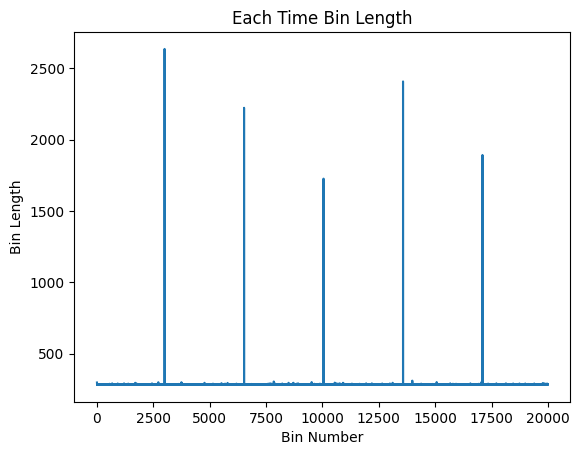

Max bin length: 2637
Min bin length: 280


In [2]:
# Time bin analysis
bin_length = [0] * (len(trigger_points) - 1)
for i in range(1, len(trigger_points)):
    bin_length[i-1] = trigger_points[i]['Index'] - trigger_points[i-1]['Index']

plt.plot(bin_length)
# plt.xlim(6520, 6530)
# plt.ylim(280, 300)

plt.title('Each Time Bin Length')
plt.xlabel('Bin Number')
plt.ylabel('Bin Length')

plt.show()

max_bin_length = max(bin_length)
min_bin_length = min(bin_length)
print(f"Max bin length: {max_bin_length}")
print(f"Min bin length: {min_bin_length}")

In [8]:
# Extract each time bin data from raw data
reduced_bin_length = min_bin_length
fix_percent = 0.5

bin_data_raw = np.zeros((len(trigger_points), reduced_bin_length))
bin_data_fixed = np.zeros((len(trigger_points), int(reduced_bin_length * fix_percent)))
bin_data_time_raw = np.zeros((len(trigger_points), reduced_bin_length))
bin_data_time_fixed = np.zeros((len(trigger_points), int(reduced_bin_length * fix_percent)))
for i in range(len(trigger_points)):
    start_index = trigger_points[i]['Index']
    end_index = start_index + reduced_bin_length
    fixed_start_index = end_index - int(reduced_bin_length * fix_percent)
    bin_data_raw[i] = bhd_ac_column[start_index:end_index]
    bin_data_fixed[i] = bhd_ac_column[fixed_start_index:end_index]
    bin_data_time_raw[i] = time_column[start_index:end_index]
    bin_data_time_fixed[i] = time_column[fixed_start_index:end_index]


In [18]:
# Output bin data to csv file
output_data = np.insert(bin_data_fixed, 0, bin_data_time_fixed[0], axis=0)

import csv
with open('data/bin_data_fixed.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(['Relative_Time'] + [f'Bin_{i}' for i in range(1,bin_data_fixed.shape[0]+1)])
    csvwriter.writerows(output_data.T)
print("Output bin data to csv file successfully")